In [3]:
import pandas as pd
#import datetime as dt
import cbpro
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_finance import candlestick2_ohlc
import plotly as py
#from plotly import figure_factory as FF
#from plotly import plotly as pypy
from plotly import graph_objs as go
py.offline.init_notebook_mode(connected=True)

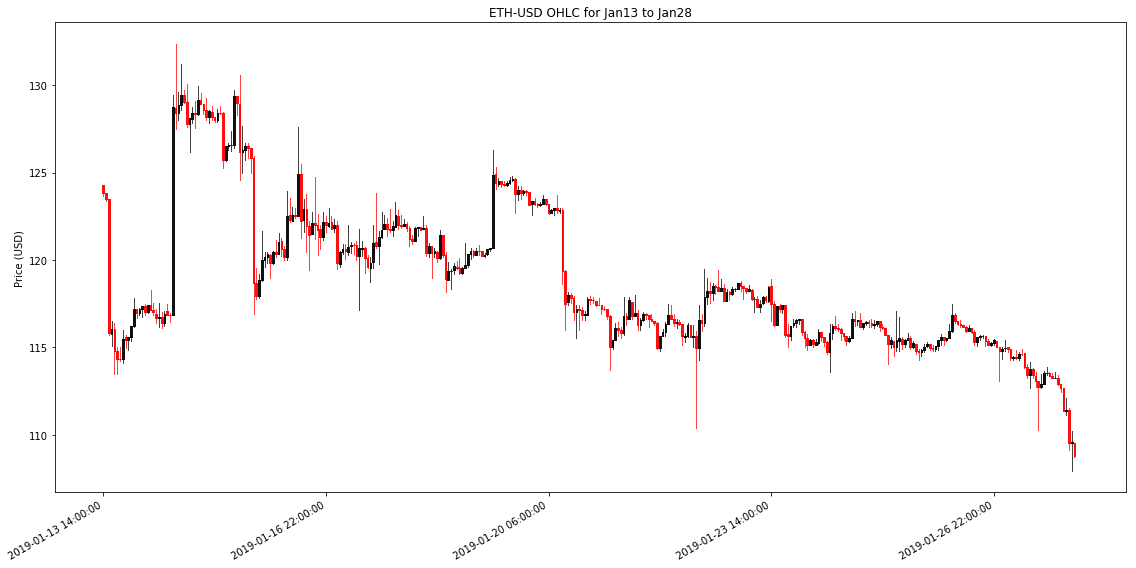

In [4]:
pc = cbpro.PublicClient()

historic_CB_rates = pd.DataFrame.from_dict(pc.get_product_historic_rates('ETH-USD',granularity=3600))
historic_CB_rates.columns = ['time','low','high','open','close','volume']
historic_CB_rates['time'] = pd.to_datetime(historic_CB_rates['time'],unit='s')

historic_CB_rates.to_pickle('hist_CB_rates.pkl')
historic_CB_rates = pd.read_pickle('D:/edX files/hist_CB_rates.pkl')

# just a quick fix to flip the date progression in the original data
historic_CB_rates = historic_CB_rates.reindex(index=historic_CB_rates.index[::-1])

fig, ax = plt.subplots(figsize=(16,8))
candlestick2_ohlc(ax,historic_CB_rates['open'],historic_CB_rates['high'],historic_CB_rates['low'],historic_CB_rates['close'],width=0.6)

xdate = [i for i in historic_CB_rates['time']]

ax.xaxis.set_major_locator(mticker.MaxNLocator(6))

def mydate(x,pos):
    try:
        return xdate[int(x)]
    except IndexError:
        return ''

ax.xaxis.set_major_formatter(mticker.FuncFormatter(mydate))

ax.set_ylabel("Price (USD)")
ax.set_title("ETH-USD OHLC for Jan13 to Jan28")

fig.autofmt_xdate()
fig.tight_layout()

plt.show()

In [5]:
CB = go.Ohlc(x=historic_CB_rates.time,
              open=historic_CB_rates.open,
              high=historic_CB_rates.high,
              low=historic_CB_rates.low,
              close=historic_CB_rates.close)

data = [CB]

layout = {
    'title' : 'ETH-USD OHLC for Jan13 to Jan28',
    'yaxis' : {'title' : 'Price (USD)'}
}

fig = dict(data=data, layout=layout)
py.offline.iplot(fig)